<a href="https://colab.research.google.com/github/deltaC/LegBiomechanics/blob/main/svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 57.4 MB/s eta 0:00:00


In [3]:
import mne

In [4]:
raw = mne.io.read_raw_edf('ходьба_4км.edf')

Extracting EDF parameters from /content/ходьба_4км.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-4-30c8bd5b5a3d>:1: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf('ходьба_4км.edf')


In [5]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: EXT ANX1-AA     , EXT ANY1-AA     , EXT ANZ1-AA     , EXT ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2024-11-06 00:00:00 UTC
 nchan: 23
 projs: []
 sfreq: 2048.0 Hz
 subject_info: 1 item (dict)
>

In [6]:
raw.ch_names

['EXT ANX1-AA\x00\x00\x00\x00\x00',
 'EXT ANY1-AA\x00\x00\x00\x00\x00',
 'EXT ANZ1-AA\x00\x00\x00\x00\x00',
 'EXT ACY4-AA\x00\x00\x00\x00\x00',
 'EXT GRZ4-AA\x00\x00\x00\x00\x00',
 'EXT ACY5-AA\x00\x00\x00\x00\x00',
 'EXT GRZ5-AA\x00\x00\x00\x00\x00',
 'EXT CoxFlexL-AA\x00',
 'EXT CoxFlexR-AA\x00',
 'EXT CoxAddL-AA\x00\x00',
 'EXT CoxAddR-AA\x00\x00',
 'EXT CoxPronL-AA\x00',
 'EXT CoxPronR-AA\x00',
 'EXT GenFlexL-AA\x00',
 'EXT GenFlexR-AA\x00',
 'EXT GenAddL-AA\x00\x00',
 'EXT GenAddR-AA\x00\x00',
 'EXT GenPronL-AA\x00',
 'EXT GenPronR-AA\x00',
 'EXT TalFlexL-AA\x00',
 'EXT TalFlexR-AA\x00',
 'EXT TalPronL-AA\x00',
 'EXT TalPronR-AA\x00']

In [7]:
new_names = ['ANX1',
 'ANY1',
 'ANZ1',
 'ACY4',
 'GRZ4',
 'ACY5',
 'GRZ5',
 'CoxFlexL',
 'CoxFlexR',
 'CoxAddL',
 'CoxAddR',
 'CoxPronL',
 'CoxPronR',
 'GenFlexL',
 'GenFlexR',
 'GenAddL',
 'GenAddR',
 'GenPronL',
 'GenPronR',
 'TalFlexL',
 'TalFlexR',
 'TalPronL',
 'TalPronR']

In [8]:
raw.rename_channels(dict(zip(raw.ch_names, new_names)))

<RawEDF | ходьба_4км.edf, 23 x 253952 (124.0 s), ~27 kB, data not loaded>

In [9]:
raw.ch_names

['ANX1',
 'ANY1',
 'ANZ1',
 'ACY4',
 'GRZ4',
 'ACY5',
 'GRZ5',
 'CoxFlexL',
 'CoxFlexR',
 'CoxAddL',
 'CoxAddR',
 'CoxPronL',
 'CoxPronR',
 'GenFlexL',
 'GenFlexR',
 'GenAddL',
 'GenAddR',
 'GenPronL',
 'GenPronR',
 'TalFlexL',
 'TalFlexR',
 'TalPronL',
 'TalPronR']

In [10]:
data = raw['data'][0]

# SVD

In [11]:
x = data[:23, 2048:2048*15]
x

array([[ -2.30441749,  -2.30441749,  -2.30991073, ...,  10.14328222,
         10.13778897,  10.13778897],
       [ -4.36438544,  -4.36438544,  -4.38086519, ...,   7.05607691,
          7.02311742,   7.02311742],
       [ 42.66330968,  42.66330968,  42.65781643, ...,  59.36278325,
         59.39024949,  59.39024949],
       ...,
       [  3.24925612,   3.24925612,   3.24925612, ...,  29.29274434,
         29.37514305,  29.37514305],
       [  4.01281758,   4.01281758,   4.02380407, ..., -16.71320668,
        -16.69123369, -16.69123369],
       [ -0.37628748,  -0.37628748,  -0.38727398, ...,  49.51338979,
         49.2387274 ,  49.2387274 ]])

In [12]:
U, S, Vh = np.linalg.svd(x, full_matrices=False)
U.shape, S.shape, Vh.shape

((23, 23), (23,), (23, 28672))

In [13]:
!pip install seaborn

In [15]:
import seaborn as sns

<Axes: >

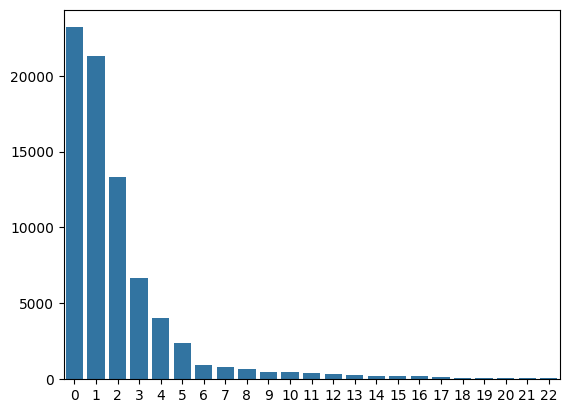

In [16]:
sns.barplot(data = S)